In [147]:
import pandas as pd
import numpy as np
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from os import listdir
from os.path import isfile, join
import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [64]:
import nltk
nltk.download("all", quiet=True)

True

In [2]:
path = 'novels/'
text_files = [f for f in listdir(path) if isfile(join(path, f))]

In [3]:
novels = [text for text in text_files]
novels = [path + novel for novel in novels]

In [4]:
content_list = []
        
for novel in novels:
    with open(novel, encoding='utf-8-sig') as f:
        content = f.read()
        content_list.append(content)
        
len(content_list)

63

In [5]:
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [6]:
def clean_word_list(text):
    tokenizer = LemNormalize
    tokens = tokenizer(text)
    words = []
    for word in tokens:
        words.append(word)
    return words

In [7]:
clean_texts = []

for text in content_list:
    clean_texts.append(clean_word_list(text))
    
len(clean_texts)

63

In [8]:
def list_to_string(orig_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(orig_list)

In [9]:
strings = []

for ct_list in clean_texts:
    strings.append(list_to_string(ct_list))
    
len(strings)

63

In [10]:
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')

In [11]:
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [12]:
stored = cos_similarity(strings)

C:\Users\Julia\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [13]:
names = [' '.join(word.title() for word in novel[7:-4].split('_')) for novel in novels]
names[42]

'The Dark Tower'

In [70]:
names_df = pd.DataFrame(names)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(names_df)

                               0
0                       11 22 63
1                   Bag Of Bones
2                  Billy Summers
3                    Black House
4                          Blaze
5                         Carrie
6                           Cell
7                      Christine
8                           Cujo
9          Cycle Of The Werewolf
10                   Desperation
11                  Doctor Sleep
12             Dolores Claiborne
13                  Dreamcatcher
14                      Duma Key
15                     Elevation
16                  End Of Watch
17               Finders Keepers
18                   Firestarter
19                From A Buick 8
20                  Geralds Game
21     Girl Who Loved Tom Gordon
22            Gwendys Button Box
23            Gwendys Final Task
24                      Insomnia
25                            It
26                       Joyland
27                         Later
28                  Liseys Story
29        

In [14]:
visual = pd.DataFrame(stored, index=names, columns=names)
print("Cosine Similarity Matrix")
visual

Cosine Similarity Matrix


,11 22 63,Bag Of Bones,Billy Summers,Black House,Blaze,Carrie,Cell,Christine,Cujo,Cycle Of The Werewolf,...,The Shining,The Stand,The Talisman,The Tommyknockers,The Waste Lands,The Wind Through The Keyhole,Thinner,Under The Dome,Wizard And Glass,Wolves Of The Calla
11 22 63,1.000000,0.335267,0.333892,0.101897,0.313820,0.118775,0.276121,0.110174,0.128603,0.054651,...,0.126416,0.071059,0.112070,0.091208,0.111995,0.304507,0.103231,0.296784,0.113895,0.104015
Bag Of Bones,0.335267,1.000000,0.921095,0.127571,0.899160,0.215714,0.906220,0.200852,0.234723,0.096778,...,0.230107,0.633789,0.206407,0.591285,0.201854,0.915981,0.190035,0.940356,0.210965,0.188940
Billy Summers,0.333892,0.921095,1.000000,0.105454,0.860509,0.112336,0.886652,0.098945,0.111727,0.078023,...,0.113108,0.545082,0.101651,0.483920,0.097860,0.900158,0.148068,0.926287,0.106999,0.098295
Black House,0.101897,0.127571,0.105454,1.000000,0.202818,0.283163,0.108245,0.280275,0.298809,0.273793,...,0.392273,0.183544,0.493943,0.220300,0.291212,0.113095,0.281201,0.103346,0.302137,0.291847
Blaze,0.313820,0.899160,0.860509,0.202818,1.000000,0.252850,0.876838,0.233835,0.277610,0.105915,...,0.269874,0.675566,0.239712,0.635244,0.231413,0.877498,0.217609,0.903985,0.239245,0.215444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Wind Through The Keyhole,0.304507,0.915981,0.900158,0.113095,0.877498,0.185595,0.896662,0.171522,0.200477,0.088581,...,0.199314,0.655428,0.184020,0.601810,0.217377,1.000000,0.166017,0.928195,0.225490,0.209151
Thinner,0.103231,0.190035,0.148068,0.281201,0.217609,0.448036,0.161571,0.420140,0.470651,0.216708,...,0.467946,0.270827,0.428486,0.334626,0.414542,0.166017,1.000000,0.150458,0.427780,0.398178
Under The Dome,0.296784,0.940356,0.926287,0.103346,0.903985,0.168912,0.931343,0.157486,0.183742,0.080421,...,0.178926,0.699758,0.163027,0.636069,0.156832,0.928195,0.150458,1.000000,0.165841,0.151093
Wizard And Glass,0.113895,0.210965,0.106999,0.302137,0.239245,0.464271,0.182570,0.448823,0.503135,0.235284,...,0.507447,0.291603,0.467396,0.359021,0.770078,0.225490,0.427780,0.165841,1.000000,0.744130


In [21]:
df_similar = visual[(visual >= 0.95) & (visual < 1)].stack()
df_similar

Bag Of Bones           Joyland                  0.951275
Blaze                  Blaze                    1.000000
Carrie                 Carrie                   1.000000
Cell                   Cell                     1.000000
Christine              Christine                1.000000
Cujo                   Cujo                     1.000000
Cycle Of The Werewolf  Cycle Of The Werewolf    1.000000
Duma Key               Duma Key                 1.000000
End Of Watch           End Of Watch             1.000000
                       Finders Keepers          0.966924
Finders Keepers        End Of Watch             0.966924
                       Finders Keepers          1.000000
Geralds Game           Geralds Game             1.000000
Gwendys Button Box     Gwendys Button Box       1.000000
                       Gwendys Final Task       0.965771
Gwendys Final Task     Gwendys Button Box       0.965771
It                     It                       1.000000
Joyland                Bag Of B

In [ ]:
# Top similar books

# 1  End Of Watch       2016     Finders Keepers    2015       0.966924
# 2  Gwendys Button Box 2017     Gwendys Final Task 2022       0.965771
# 3  Joyland            2013     Under The Dome     2009       0.964749
# 4  Joyland            2013     Revival            2014       0.956291
# 5  Bag Of Bones       1998     Joyland            2013       0.951275
# 6  Joyland            2013     The Outsider       2018       0.950588
# 7  Revival            2014     Under The Dome     2009       0.950219

In [29]:
df_different = visual[(visual <= 0.05)].stack()
df_different

End Of Watch        The Gunslinger        0.040495
                    The Long Walk         0.043786
Finders Keepers     The Gunslinger        0.049840
Gwendys Button Box  The Long Walk         0.042023
The Gunslinger      End Of Watch          0.040495
                    Finders Keepers       0.049840
The Long Walk       End Of Watch          0.043786
                    Gwendys Button Box    0.042023
dtype: float64

In [ ]:
# The Gunsliner (1982), The Long Walk (1979)

In [142]:
dt_novels = ['The Gunslinger', 'The Drawing Of The Three',\
             'The Waste Lands', 'Wizard And Glass', \
             'Wolves Of The Calla','Song Of Susannah', 'The Dark Tower',\
            'The Wind Through The Keyhole']

dark_tower_df = visual.loc[dt_novels, :]
dark_tower_df[dt_novels]

,The Gunslinger,The Drawing Of The Three,The Waste Lands,Wizard And Glass,Wolves Of The Calla,Song Of Susannah,The Dark Tower,The Wind Through The Keyhole
The Gunslinger,1.000000,0.350355,0.299978,0.291007,0.267451,0.245445,0.624142,0.648828
The Drawing Of The Three,0.350355,1.000000,0.782652,0.686903,0.764057,0.693004,0.308536,0.226433
The Waste Lands,0.299978,0.782652,1.000000,0.770078,0.868579,0.777107,0.369143,0.217377
Wizard And Glass,0.291007,0.686903,0.770078,1.000000,0.744130,0.653631,0.333873,0.225490
Wolves Of The Calla,0.267451,0.764057,0.868579,0.744130,1.000000,0.807468,0.360180,0.209151
Song Of Susannah,0.245445,0.693004,0.777107,0.653631,0.807468,1.000000,0.332775,0.197719
The Dark Tower,0.624142,0.308536,0.369143,0.333873,0.360180,0.332775,1.000000,0.916445
The Wind Through The Keyhole,0.648828,0.226433,0.217377,0.225490,0.209151,0.197719,0.916445,1.000000


In [173]:
def plot_heatmap(df_name, label_names, title, file_name, num):

    fig, ax = plt.subplots(figsize=(15, 20))

    sns.heatmap(df_name, 
                cmap='BuPu', 
    #             vmin=1.56, 
    #             vmax=4.15, 
                square=True,
                linewidth=0.3, 
                cbar_kws={'shrink': .49}, 
                annot=True, 
                fmt='.1f'
               )

    xy_ticks_labels = label_names
    plt.yticks(np.arange(num) + .5, labels=xy_ticks_labels)
    plt.xticks(np.arange(num) + .5, labels=xy_ticks_labels, rotation=90)
    ax.xaxis.tick_top()

    plt.xlabel('')
    plt.ylabel('')
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set(fontsize=15)

    plt.title(title, fontsize=22, pad=20)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    
    plt.tight_layout()

    plt.savefig(file_name+'.png')

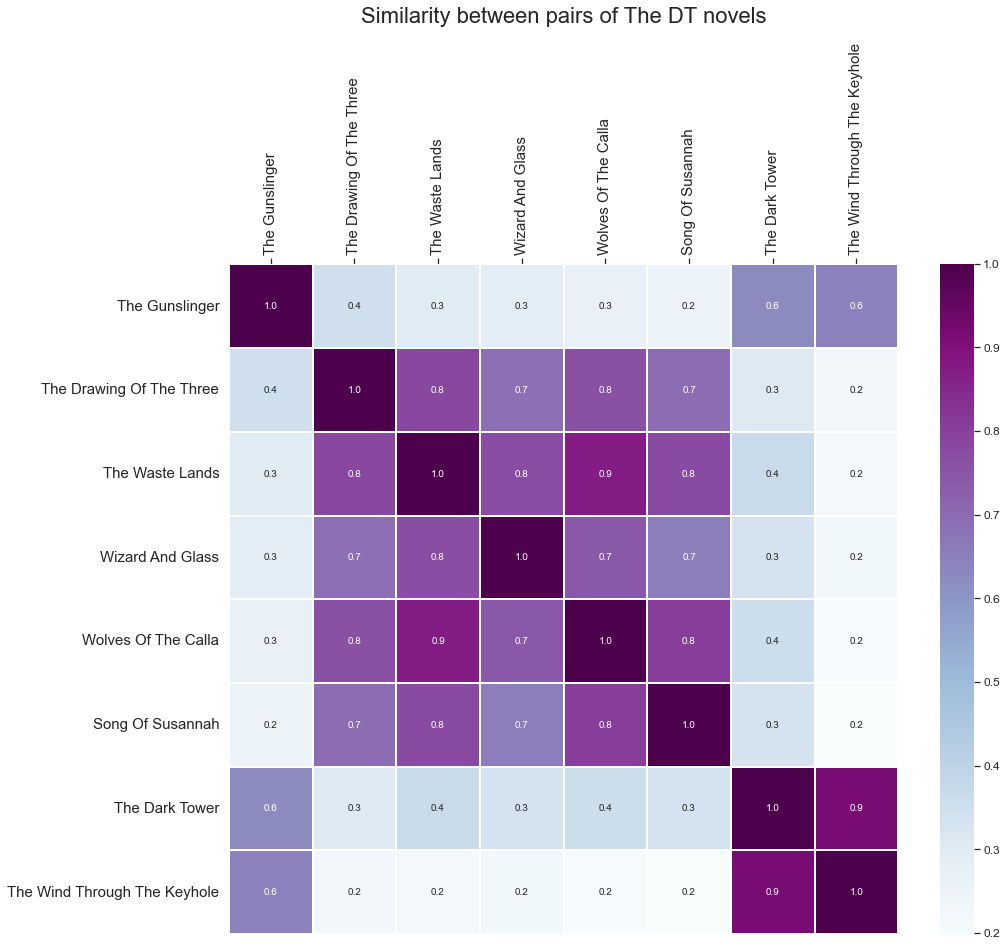

In [174]:
plot_heatmap(dark_tower_df[dt_novels], dt_novels, 'Similarity between pairs of The DT novels', 'dt-heatmap', 8)

In [ ]:
# Most similar in The Dark Tower series:
# The Wind Through The Keyhole — The Dark Tower 0.916445
# The Waste Lands — Wolves Of The Calla 0.868579
# Song Of Susannah — Wolves Of The Calla 0.807468
# The Waste Lands — The Drawing Of The Three 0.782652
# Song Of Susannah — The Waste Lands 0.777107
# Wizard And Glass — The Waste Lands 0.770078
# Wolves Of The Calla — The Drawing Of The Three 0.764057
# Wolves Of The Calla — Wizard And Glass 0.744130

# Most different books in The Dark Tower series:
# The Wind Through The Keyhole — Song Of Susannah 0.197719
# The Wind Through The Keyhole — Wolves Of The Calla 0.209151
# The Wind Through The Keyhole — The Waste Lands 0.217377
# The Wind Through The Keyhole — Wizard And Glass 0.225490
# The Wind Through The Keyhole — The Drawing Of The Three 0.226433

# Song Of Susannah — The Gunslinger 0.245445
# Wolves Of The Calla — The Gunslinger 0.267451
# Wizard And Glass — The Gunslinger 0.291007
# The Waste Lands — The Gunslinger 0.299978

# The book most similar to The Gunslinger:
# The Wind Through The Keyhole 0.648828
# The Dark Tower 0.624142

In [140]:
def plot_words_frequency(text):
    tokenizer = LemNormalize
    tokens = tokenizer(text)
    
    words = []
    for word in tokens:
        words.append(word.lower())
    
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['’', '“', '”', 'wa', '‘', '...', '…', '–', '—', 'ha'])
    
    words2 = []
    for word in words:
        if word not in stopwords:
            words2.append(word)
    
    freqdist = nltk.FreqDist(words2)
    # print top 25 most common words
    # print(freqdist.most_common(25))
    freqdist.plot(25)

Word frequency in the novel End Of Watch


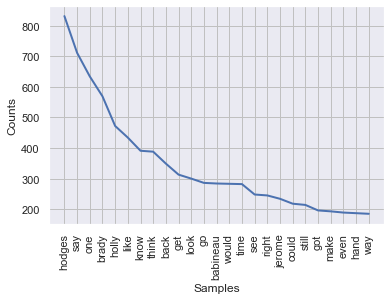

In [141]:
print('Word frequency in the novel', names[16])
plot_words_frequency(content_list[16])

Word frequency in the novel Finders Keepers


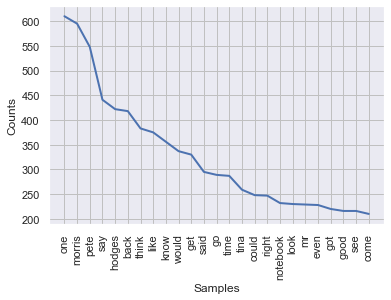

In [88]:
print('Word frequency in the novel', names[17])
plot_words_frequency(content_list[17])

Word frequency in the novel Gwendys Button Box


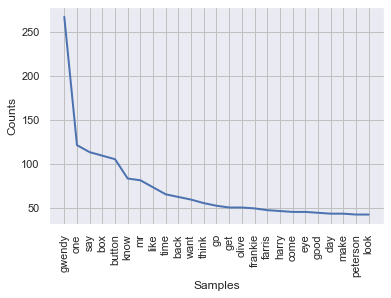

In [89]:
print('Word frequency in the novel', names[22])
plot_words_frequency(content_list[22])

Word frequency in the novel Gwendys Final Task


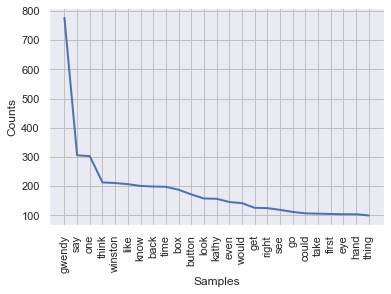

In [90]:
print('Word frequency in the novel', names[23])
plot_words_frequency(content_list[23])

Word frequency in the novel Joyland


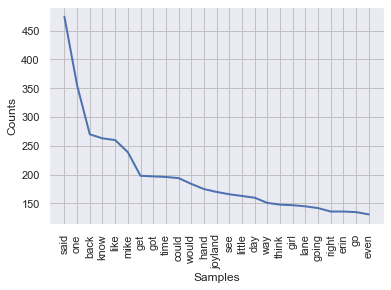

In [91]:
print('Word frequency in the novel', names[26])
plot_words_frequency(content_list[26])

Word frequency in the novel Under The Dome


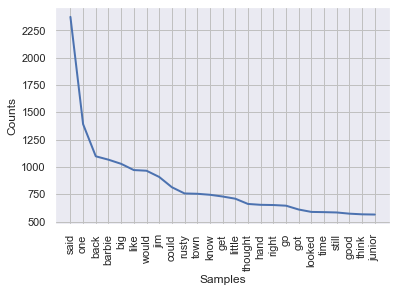

In [92]:
print('Word frequency in the novel', names[60])
plot_words_frequency(content_list[60])

Word frequency in the novel The Waste Lands


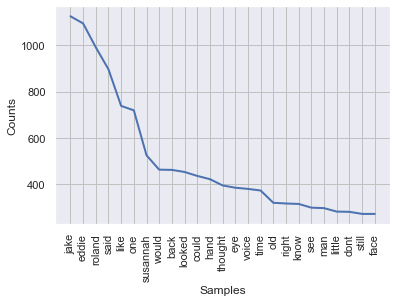

In [93]:
print('Word frequency in the novel', names[57])
plot_words_frequency(content_list[57])

Word frequency in the novel Wolves Of The Calla


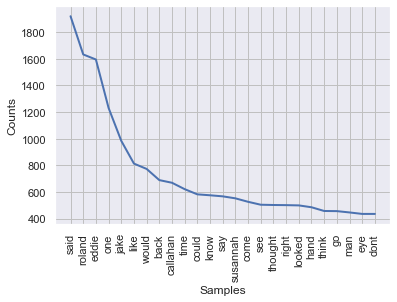

In [94]:
print('Word frequency in the novel', names[62])
plot_words_frequency(content_list[62])

Word frequency in the novel The Dark Tower


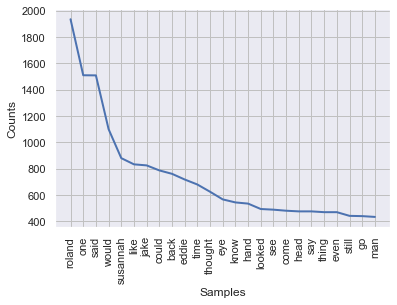

In [95]:
print('Word frequency in the novel', names[42])
plot_words_frequency(content_list[42])

Word frequency in the novel The Gunslinger


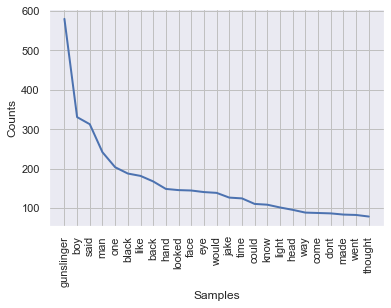

In [96]:
print('Word frequency in the novel', names[47])
plot_words_frequency(content_list[47])

Word frequency in the novel The Wind Through The Keyhole


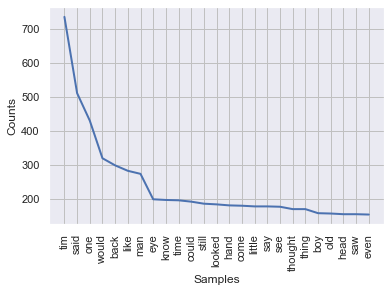

In [143]:
print('Word frequency in the novel', names[58])
plot_words_frequency(content_list[58])

In [97]:
coathor_books = ['The Talisman', 'Black House', 'Gwendys Button Box', 'Sleeping Beauties', 'Gwendys Final Task']

coathor_df = visual.loc[coathor_books, :]
coathor_df

,11 22 63,Bag Of Bones,Billy Summers,Black House,Blaze,Carrie,Cell,Christine,Cujo,Cycle Of The Werewolf,...,The Shining,The Stand,The Talisman,The Tommyknockers,The Waste Lands,The Wind Through The Keyhole,Thinner,Under The Dome,Wizard And Glass,Wolves Of The Calla
The Talisman,0.112070,0.206407,0.101651,0.493943,0.239712,0.469880,0.175689,0.448138,0.509434,0.235294,...,0.626633,0.290934,1.000000,0.381009,0.457744,0.184020,0.428486,0.163027,0.467396,0.439101
Black House,0.101897,0.127571,0.105454,1.000000,0.202818,0.283163,0.108245,0.280275,0.298809,0.273793,...,0.392273,0.183544,0.493943,0.220300,0.291212,0.113095,0.281201,0.103346,0.302137,0.291847
Gwendys Button Box,0.271091,0.762016,0.789089,0.101504,0.710094,0.082141,0.733239,0.077188,0.086647,0.075641,...,0.089544,0.458830,0.082735,0.407572,0.078592,0.745778,0.076925,0.768299,0.087292,0.077885
Sleeping Beauties,0.307509,0.933672,0.911454,0.110364,0.895995,0.197947,0.913498,0.182548,0.214581,0.081683,...,0.209361,0.678833,0.188039,0.624592,0.182122,0.914879,0.172832,0.945271,0.190750,0.170555
Gwendys Final Task,0.274935,0.806428,0.824192,0.093568,0.757441,0.095995,0.783615,0.089609,0.104134,0.067343,...,0.104186,0.520947,0.095287,0.465700,0.092531,0.792482,0.088059,0.821315,0.099673,0.089634


In [103]:
coathor_similar = coathor_df[(coathor_df >= 0.85)].stack()
coathor_similar

The Talisman        The Talisman                    1.000000
Black House         Black House                     1.000000
Gwendys Button Box  Gwendys Button Box              1.000000
                    Gwendys Final Task              0.965771
Sleeping Beauties   Bag Of Bones                    0.933672
                    Billy Summers                   0.911454
                    Blaze                           0.895995
                    Cell                            0.913498
                    Doctor Sleep                    0.923030
                    Duma Key                        0.928171
                    Elevation                       0.907241
                    Insomnia                        0.874596
                    Joyland                         0.949744
                    Later                           0.928649
                    Mr Mercedes                     0.887420
                    Needful Things                  0.928754
                    Revi

In [ ]:
# The Talisman and Black House are very different from other Stephen King books
# while Sleeping Beauties looks very similar to a variety of SK books

# Both Gwendy books are similar to each other

In [108]:
coathor_different = coathor_df[(coathor_df <= 0.08)].stack()
coathor_different

The Talisman        End Of Watch              0.079240
Gwendys Button Box  Christine                 0.077188
                    Cycle Of The Werewolf     0.075641
                    Pet Sematary              0.066640
                    Song Of Susannah          0.075019
                    The Dark Half             0.062868
                    The Eyes Of The Dragon    0.069612
                    The Long Walk             0.042023
                    The Running Man           0.059448
                    The Waste Lands           0.078592
                    Thinner                   0.076925
                    Wolves Of The Calla       0.077885
Gwendys Final Task  Cycle Of The Werewolf     0.067343
                    The Dark Half             0.074890
                    The Long Walk             0.050775
                    The Running Man           0.069132
dtype: float64

Word frequency in the novel Sleeping Beauties


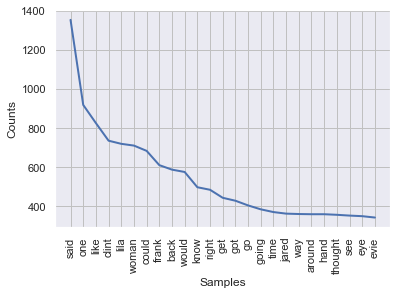

In [109]:
print('Word frequency in the novel', names[38])
plot_words_frequency(content_list[38])

Word frequency in the novel Under The Dome


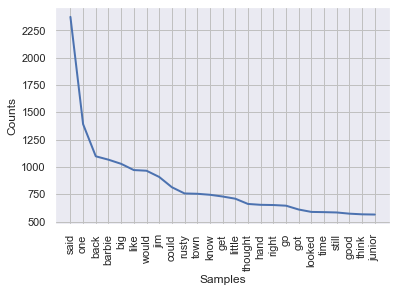

In [114]:
print('Word frequency in the novel', names[60])
plot_words_frequency(content_list[60])

In [133]:
files = glob.glob('novels/*.txt')

with open('novels/all_novels.txt', 'w', encoding='utf-8-sig') as result:
    for file_ in files:
        for line in open(file_, 'r', encoding='utf-8-sig'):
            result.write(line)

In [134]:
with open('novels/all_novels.txt', encoding='utf-8-sig') as f:
    all_content = f.read()

Word frequency in all Stephen King novels


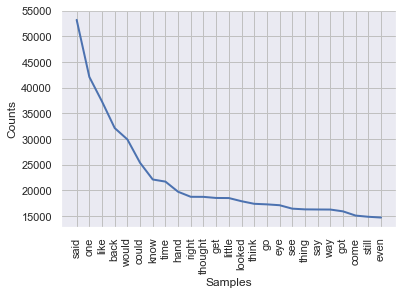

In [135]:
print('Word frequency in all Stephen King novels')
plot_words_frequency(all_content)

In [136]:
# def plot_least_frequent(text):
#     tokenizer = LemNormalize
#     tokens = tokenizer(text)
    
#     words = []
#     for word in tokens:
#         words.append(word.lower())
    
#     stopwords = nltk.corpus.stopwords.words('english')
#     stopwords.extend(['’', '“', '”', 'wa', '‘', '...', '…', '–', '—', 'ha'])
    
#     words2 = []
#     for word in words:
#         if word not in stopwords:
#             words2.append(word)
    
#     freqdist = nltk.FreqDist(words2)
#     least_freq = nltk.FreqDist(dict(freqdist.most_common()[-25:]))
#     least_freq.plot()